In [1]:
import numpy as np
from matplotlib import pyplot
from scipy import linalg
import copy
import iMPS
from scipy.sparse import linalg
import funcs
import time

In [2]:
X = np.array([[0,1],[1,0]])
Id = np.eye(2)

X123 = np.zeros([1,1,64,64])
X123[0,0,:,:] = np.kron(X,np.kron(X,np.kron(X,np.kron(Id,np.kron(Id,Id)))))

X1234 = np.zeros([1,1,64,64])
X1234[0,0,:,:] = np.kron(X,np.kron(X,np.kron(X,np.kron(X,np.kron(Id,Id)))))


X12 = np.zeros([1,1,64,64])
X12[0,0,:,:] = np.kron(X,np.kron(X,np.kron(Id,np.kron(Id,np.kron(Id,Id)))))

X13 = np.zeros([1,1,64,64])
X13[0,0,:,:] = np.kron(X,np.kron(Id,np.kron(X,np.kron(Id,np.kron(Id,Id)))))

X14 = np.zeros([1,1,64,64])
X14[0,0,:,:] = np.kron(X,np.kron(Id,np.kron(Id,np.kron(X,np.kron(Id,Id)))))

X16 = np.zeros([1,1,64,64])
X16[0,0,:,:] = np.kron(X,np.kron(Id,np.kron(Id,np.kron(Id,np.kron(Id,X)))))

X15 = np.zeros([1,1,64,64])
X15[0,0,:,:] = np.kron(X,np.kron(Id,np.kron(Id,np.kron(Id,np.kron(X,Id)))))


X23 = np.zeros([1,1,64,64])
X23[0,0,:,:] = np.kron(Id,np.kron(X,np.kron(X,np.kron(Id,np.kron(Id,Id)))))

X24 = np.zeros([1,1,64,64])
X24[0,0,:,:] = np.kron(Id,np.kron(X,np.kron(Id,np.kron(X,np.kron(Id,Id)))))

X26 = np.zeros([1,1,64,64])
X26[0,0,:,:] = np.kron(Id,np.kron(X,np.kron(Id,np.kron(Id,np.kron(Id,X)))))

X25 = np.zeros([1,1,64,64])
X25[0,0,:,:] = np.kron(Id,np.kron(X,np.kron(Id,np.kron(Id,np.kron(X,Id)))))


X46 = np.zeros([1,1,64,64])
X46[0,0,:,:] = np.kron(Id,np.kron(Id,np.kron(Id,np.kron(X,np.kron(Id,X)))))

X45 = np.zeros([1,1,64,64])
X45[0,0,:,:] = np.kron(Id,np.kron(Id,np.kron(Id,np.kron(X,np.kron(X,Id)))))

MPO123 = iMPS.iMPO()
MPO123.construct_from_tensor_list([X123,X123])

MPO1234 = iMPS.iMPO()
MPO1234.construct_from_tensor_list([X1234,X1234])


MPO16 = iMPS.iMPO()
MPO16.construct_from_tensor_list([X16,X16])

MPO14 = iMPS.iMPO()
MPO14.construct_from_tensor_list([X14,X14])

MPO13 = iMPS.iMPO()
MPO13.construct_from_tensor_list([X13,X13])

MPO12 = iMPS.iMPO()
MPO12.construct_from_tensor_list([X12,X12])

MPO15 = iMPS.iMPO()
MPO15.construct_from_tensor_list([X15,X15])


MPO26 = iMPS.iMPO()
MPO26.construct_from_tensor_list([X26,X26])

MPO24 = iMPS.iMPO()
MPO24.construct_from_tensor_list([X24,X24])

MPO23 = iMPS.iMPO()
MPO23.construct_from_tensor_list([X23,X23])


MPO25 = iMPS.iMPO()
MPO25.construct_from_tensor_list([X25,X25])


MPO45 = iMPS.iMPO()
MPO45.construct_from_tensor_list([X45,X45])

MPO46 = iMPS.iMPO()
MPO46.construct_from_tensor_list([X46,X46])


In [ ]:
lam1ss=[]
lam12ss=[]
lam13ss=[]
lam14ss=[]
lam15ss=[]
lam16ss=[]
lam22ss=[]
lam23ss=[]
lam24ss=[]
lam25ss=[]
lam26ss=[]
lam123ss=[]
lam1234ss=[]
dims=[]

Z = np.array([[1,0],[0,-1]])
X = np.array([[0,1],[1,0]])
A = np.array([[0.3,0.2],[-0.2,0.1]])
B = np.zeros([1,1,64])
B[0,0] =linalg.expm((np.kron(A,np.kron(A,A)))).reshape([64,])

MPS = iMPS.iMPS()
MPS.svd_threshold =1e-10
MPS.max_bond = 10
MPS.construct_from_tensor_list([B,B])

#rng = np.arange(0.,.01,0.04)
for p1 in np.arange(0.48,0.7,0.02):   
    
    lam12s=[]
    lam13s=[]
    lam14s=[]
    lam1234s=[]
    lam123s=[]
    lam15s=[]
    lam16s=[]
    lam23s=[]
    lam24s=[]
    lam25s=[]
    lam26s=[]
    for p3 in np.arange(0.29,.295,0.01):
        t1 = time.time()
        trans = funcs.single_trans_2layers_proj(p1=p1,channel1='deamp',p2=p1,channel2='deamp')
        MPO = iMPS.iMPO()
        MPO.construct_from_tensor_list([trans,trans])

        MPS_power2 = iMPS.MPS_power_method_twosite(MPS,MPO,max_bond=10)
        MPS_power2.update(10,1e-3,1e-3)  
        
        dims.append(MPS_power2.MPS2.chi[0])
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO123,MPS_power2.MPS2)
        lam123 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO1234,MPS_power2.MPS2)
        lam1234 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO12,MPS_power2.MPS2)
        lam12 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO13,MPS_power2.MPS2)
        lam13 = strap.calculate_eig()
        
    
        strap = iMPS.strap(MPS_power2.MPS2,MPO14,MPS_power2.MPS2)
        lam14 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO15,MPS_power2.MPS2)
        lam15 = strap.calculate_eig()
        
    
        strap = iMPS.strap(MPS_power2.MPS2,MPO16,MPS_power2.MPS2)
        lam16 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO23,MPS_power2.MPS2)
        lam23 = strap.calculate_eig()
        
    
        strap = iMPS.strap(MPS_power2.MPS2,MPO24,MPS_power2.MPS2)
        lam24 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO25,MPS_power2.MPS2)
        lam25 = strap.calculate_eig()
        
    
        strap = iMPS.strap(MPS_power2.MPS2,MPO26,MPS_power2.MPS2)
        lam26 = strap.calculate_eig()
        
        lam123s.append(lam123)
        lam1234s.append(lam1234)
        lam12s.append(lam12)
        lam13s.append(lam13)
        lam14s.append(lam14)
        lam15s.append(lam15)
        lam16s.append(lam16)
        lam23s.append(lam23)
        lam24s.append(lam24)
        lam25s.append(lam25)
        lam26s.append(lam26)
        t2 =  time.time()
        print(lam12s)
        print(lam23s)
        print(t2-t1)

    lam12ss.append(lam12s)
    lam13ss.append(lam13s)
    lam14ss.append(lam14s)
    lam15ss.append(lam15s)
    lam16ss.append(lam16s)
    
    lam1234ss.append(lam1234s)
    lam123ss.append(lam123s)
    lam23ss.append(lam23s)
    lam24ss.append(lam24s)
    lam25ss.append(lam25s)
    lam26ss.append(lam26s)
    print(p1)

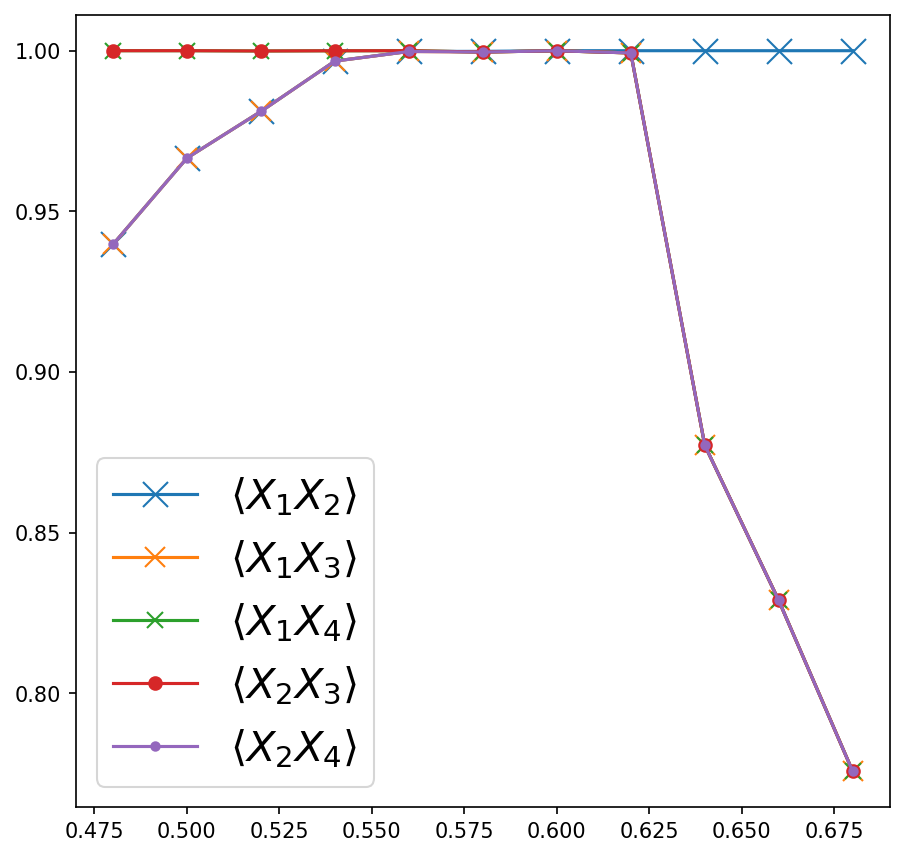

In [25]:
pyplot.figure(figsize=(7,7),dpi=150)
#pyplot.plot(rng,lam1234s,'.',label='$\langle X_1X_2X_3X_4 \\rangle$')
rng = np.arange(0.48,0.7,0.02)


pyplot.plot(rng,np.abs(lam12ss),'x-',label='$\langle X_1X_2 \\rangle$',markersize=12)
pyplot.plot(rng,np.abs(lam13ss),'x-',label='$\langle X_1X_3 \\rangle$',markersize=10)
pyplot.plot(rng,np.abs(lam14ss),'x-',label='$\langle X_1X_4 \\rangle$',markersize=8)


pyplot.plot(rng,np.abs(lam23ss),'o-',label='$\langle X_2X_3 \\rangle$',markersize=6)
pyplot.plot(rng,np.abs(lam24ss),'o-',label='$\langle X_2X_4 \\rangle$',markersize=4)
#pyplot.plot(rng,[1]*len(rng))
#pyplot.plot(rng[-25:],k*np.array(rng[-25:])+d,label='3.3399*p - 0.68003')
pyplot.legend(prop={'size':20})
pyplot.show()

In [ ]:
lam1ss=[]
lam12ss=[]
lam13ss=[]
lam14ss=[]
lam15ss=[]
lam16ss=[]
lam22ss=[]
lam23ss=[]
lam24ss=[]
lam25ss=[]
lam26ss=[]
lam123ss=[]
lam1234ss=[]
dims=[]

Z = np.array([[1,0],[0,-1]])
X = np.array([[0,1],[1,0]])
A = np.array([[0.3,0.2],[-0.2,0.1]])
B = np.zeros([1,1,64])
B[0,0] =linalg.expm((np.kron(A,np.kron(A,A)))).reshape([64,])

MPS = iMPS.iMPS()
MPS.svd_threshold =1e-10
MPS.max_bond = 10
MPS.construct_from_tensor_list([B,B])

#rng = np.arange(0.,.01,0.04)
for p1 in np.arange(0.6,0.75,0.02):   
    
    lam12s=[]
    lam13s=[]
    lam14s=[]
    lam1234s=[]
    lam123s=[]
    lam15s=[]
    lam16s=[]
    lam23s=[]
    lam24s=[]
    lam25s=[]
    lam26s=[]
    for p3 in np.arange(0.29,.295,0.01):
        t1 = time.time()
        trans = funcs.single_trans_2layers_proj(p1=p1,channel1='deamp',p2=0,channel2='deamp')
        MPO = iMPS.iMPO()
        MPO.construct_from_tensor_list([trans,trans])

        MPS_power2 = iMPS.MPS_power_method_twosite(MPS,MPO,max_bond=10)
        MPS_power2.update(10,1e-3,1e-3)  
        
        dims.append(MPS_power2.MPS2.chi[0])
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO123,MPS_power2.MPS2)
        lam123 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO1234,MPS_power2.MPS2)
        lam1234 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO12,MPS_power2.MPS2)
        lam12 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO13,MPS_power2.MPS2)
        lam13 = strap.calculate_eig()
        
    
        strap = iMPS.strap(MPS_power2.MPS2,MPO14,MPS_power2.MPS2)
        lam14 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO15,MPS_power2.MPS2)
        lam15 = strap.calculate_eig()
        
    
        strap = iMPS.strap(MPS_power2.MPS2,MPO16,MPS_power2.MPS2)
        lam16 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO23,MPS_power2.MPS2)
        lam23 = strap.calculate_eig()
        
    
        strap = iMPS.strap(MPS_power2.MPS2,MPO24,MPS_power2.MPS2)
        lam24 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO25,MPS_power2.MPS2)
        lam25 = strap.calculate_eig()
        
    
        strap = iMPS.strap(MPS_power2.MPS2,MPO26,MPS_power2.MPS2)
        lam26 = strap.calculate_eig()
        
        lam123s.append(lam123)
        lam1234s.append(lam1234)
        lam12s.append(lam12)
        lam13s.append(lam13)
        lam14s.append(lam14)
        lam15s.append(lam15)
        lam16s.append(lam16)
        lam23s.append(lam23)
        lam24s.append(lam24)
        lam25s.append(lam25)
        lam26s.append(lam26)
        t2 =  time.time()
        print(lam12s)
        print(lam23s)
        print(t2-t1)

    lam12ss.append(lam12s)
    lam13ss.append(lam13s)
    lam14ss.append(lam14s)
    lam15ss.append(lam15s)
    lam16ss.append(lam16s)
    
    lam1234ss.append(lam1234s)
    lam123ss.append(lam123s)
    lam23ss.append(lam23s)
    lam24ss.append(lam24s)
    lam25ss.append(lam25s)
    lam26ss.append(lam26s)
    print(p1)

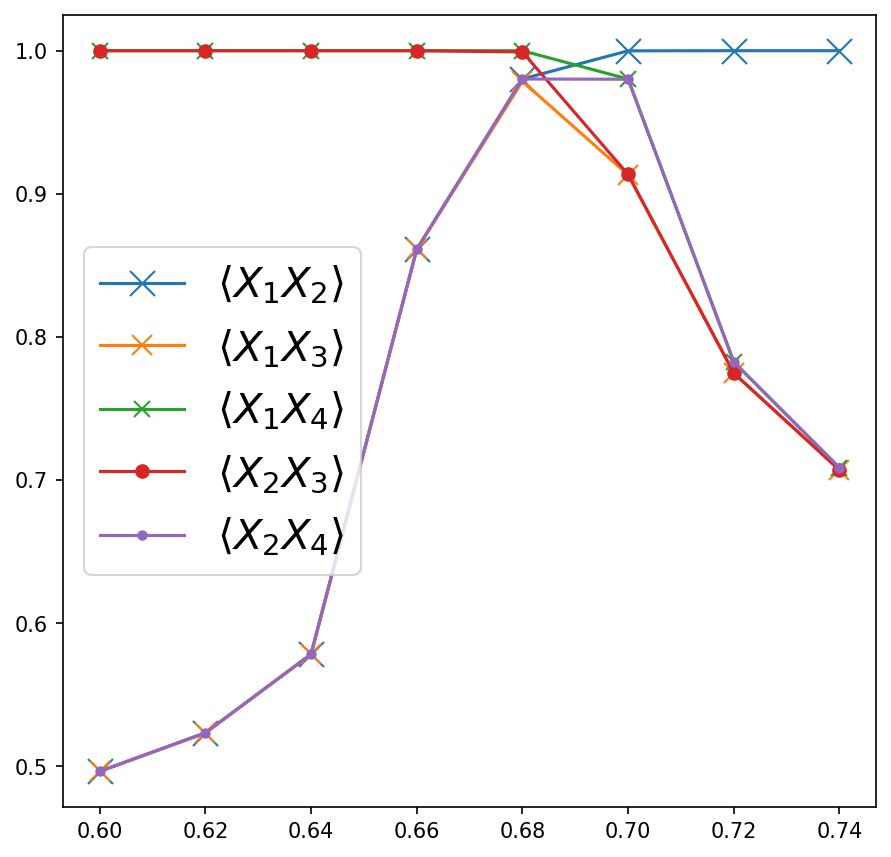

In [32]:
pyplot.figure(figsize=(7,7),dpi=150)
#pyplot.plot(rng,lam1234s,'.',label='$\langle X_1X_2X_3X_4 \\rangle$')
rng = np.arange(0.6,0.75,0.02)


pyplot.plot(rng,np.abs(lam12ss),'x-',label='$\langle X_1X_2 \\rangle$',markersize=12)
pyplot.plot(rng,np.abs(lam13ss),'x-',label='$\langle X_1X_3 \\rangle$',markersize=10)
pyplot.plot(rng,np.abs(lam14ss),'x-',label='$\langle X_1X_4 \\rangle$',markersize=8)


pyplot.plot(rng,np.abs(lam23ss),'o-',label='$\langle X_2X_3 \\rangle$',markersize=6)
pyplot.plot(rng,np.abs(lam24ss),'o-',label='$\langle X_2X_4 \\rangle$',markersize=4)
#pyplot.plot(rng,[1]*len(rng))
#pyplot.plot(rng[-25:],k*np.array(rng[-25:])+d,label='3.3399*p - 0.68003')
pyplot.legend(prop={'size':20})
pyplot.show()

In [ ]:
lam1ss=[]
lam12ss=[]
lam13ss=[]
lam14ss=[]
lam15ss=[]
lam16ss=[]
lam22ss=[]
lam23ss=[]
lam24ss=[]
lam25ss=[]
lam26ss=[]
lam123ss=[]
lam1234ss=[]
dims=[]

Z = np.array([[1,0],[0,-1]])
X = np.array([[0,1],[1,0]])
A = np.array([[0.3,0.2],[-0.2,0.1]])
B = np.zeros([1,1,64])
B[0,0] =linalg.expm((np.kron(A,np.kron(A,A)))).reshape([64,])

MPS = iMPS.iMPS()
MPS.svd_threshold =1e-10
MPS.max_bond = 10
MPS.construct_from_tensor_list([B,B])

#rng = np.arange(0.,.01,0.04)
for p1 in np.arange(0.15,0.2,0.01):   
    
    lam12s=[]
    lam13s=[]
    lam14s=[]
    lam1234s=[]
    lam123s=[]
    lam15s=[]
    lam16s=[]
    lam23s=[]
    lam24s=[]
    lam25s=[]
    lam26s=[]
    for p3 in np.arange(0.29,.295,0.01):
        t1 = time.time()
        trans = funcs.single_trans_2layers_proj(p1=p1,channel1='x_flip',p2=p1,channel2='x_flip')
        MPO = iMPS.iMPO()
        MPO.construct_from_tensor_list([trans,trans])

        MPS_power2 = iMPS.MPS_power_method_twosite(MPS,MPO,max_bond=10)
        MPS_power2.update(10,1e-3,1e-3)  
        
        dims.append(MPS_power2.MPS2.chi[0])
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO123,MPS_power2.MPS2)
        lam123 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO1234,MPS_power2.MPS2)
        lam1234 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO12,MPS_power2.MPS2)
        lam12 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO13,MPS_power2.MPS2)
        lam13 = strap.calculate_eig()
        
    
        strap = iMPS.strap(MPS_power2.MPS2,MPO14,MPS_power2.MPS2)
        lam14 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO15,MPS_power2.MPS2)
        lam15 = strap.calculate_eig()
        
    
        strap = iMPS.strap(MPS_power2.MPS2,MPO16,MPS_power2.MPS2)
        lam16 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO23,MPS_power2.MPS2)
        lam23 = strap.calculate_eig()
        
    
        strap = iMPS.strap(MPS_power2.MPS2,MPO24,MPS_power2.MPS2)
        lam24 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO25,MPS_power2.MPS2)
        lam25 = strap.calculate_eig()
        
    
        strap = iMPS.strap(MPS_power2.MPS2,MPO26,MPS_power2.MPS2)
        lam26 = strap.calculate_eig()
        
        lam123s.append(lam123)
        lam1234s.append(lam1234)
        lam12s.append(lam12)
        lam13s.append(lam13)
        lam14s.append(lam14)
        lam15s.append(lam15)
        lam16s.append(lam16)
        lam23s.append(lam23)
        lam24s.append(lam24)
        lam25s.append(lam25)
        lam26s.append(lam26)
        t2 =  time.time()
        print(lam12s)
        print(lam23s)
        print(t2-t1)

    lam12ss.append(lam12s)
    lam13ss.append(lam13s)
    lam14ss.append(lam14s)
    lam15ss.append(lam15s)
    lam16ss.append(lam16s)
    
    lam1234ss.append(lam1234s)
    lam123ss.append(lam123s)
    lam23ss.append(lam23s)
    lam24ss.append(lam24s)
    lam25ss.append(lam25s)
    lam26ss.append(lam26s)
    print(p1)

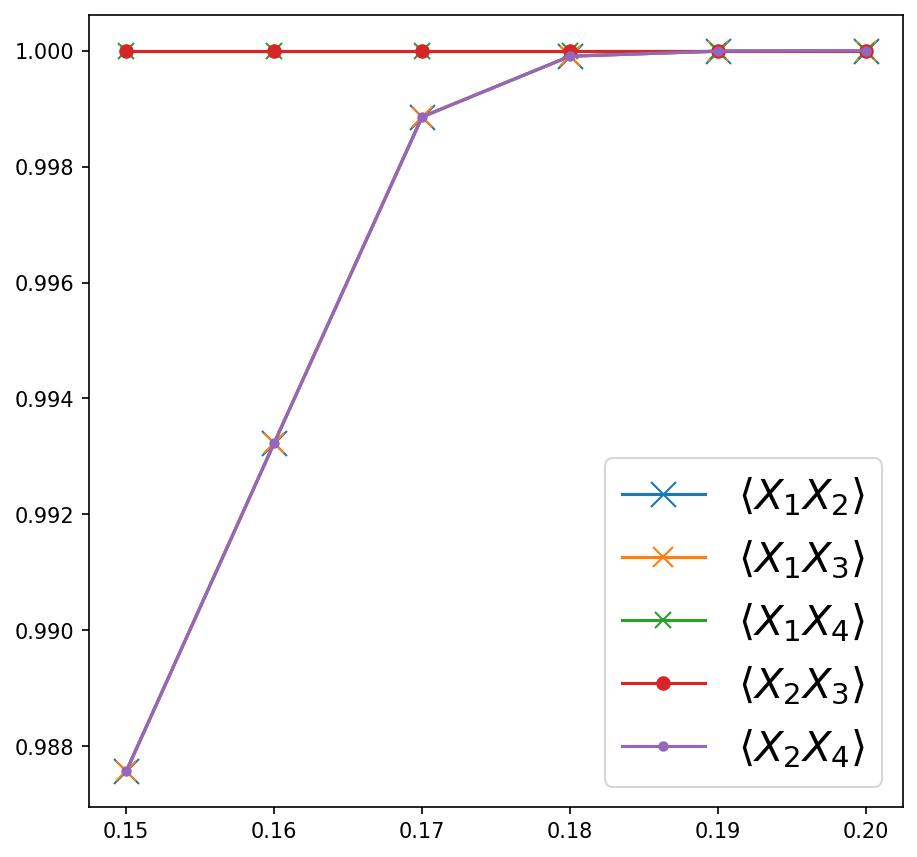

In [29]:
pyplot.figure(figsize=(7,7),dpi=150)
#pyplot.plot(rng,lam1234s,'.',label='$\langle X_1X_2X_3X_4 \\rangle$')
rng = np.arange(0.15,0.2,0.01)


pyplot.plot(rng,np.abs(lam12ss),'x-',label='$\langle X_1X_2 \\rangle$',markersize=12)
pyplot.plot(rng,np.abs(lam13ss),'x-',label='$\langle X_1X_3 \\rangle$',markersize=10)
pyplot.plot(rng,np.abs(lam14ss),'x-',label='$\langle X_1X_4 \\rangle$',markersize=8)


pyplot.plot(rng,np.abs(lam23ss),'o-',label='$\langle X_2X_3 \\rangle$',markersize=6)
pyplot.plot(rng,np.abs(lam24ss),'o-',label='$\langle X_2X_4 \\rangle$',markersize=4)
#pyplot.plot(rng,[1]*len(rng))
#pyplot.plot(rng[-25:],k*np.array(rng[-25:])+d,label='3.3399*p - 0.68003')
pyplot.legend(prop={'size':20})
pyplot.show()

In [15]:
c = np.zeros([2,2,2])
c[0,:,:] = np.eye(2)
c[1,:,:] = np.array([[0,1],[1,0]])
C = np.tensordot(c,c,([2],[1]))
C = np.transpose(C,[0,2,1,3])

In [21]:
E = np.zeros([2,2,2,2,2])
E[0,0,0,0,0] = 1 
E[1,1,1,1,0] = 1
E[0,0,0,0,1] = 1
E[1,1,1,1,1] = -1
    
c = np.zeros([2,2,2])
c[0,:,:] = np.eye(2)
c[1,:,:] = np.array([[0,1],[1,0]])
    

EC = np.tensordot(c,E,([0],[0]))
ECC = np.tensordot(EC,c,([5],[0]))

In [7]:
lam1ss=[]
lam12ss=[]
lam13ss=[]
lam14ss=[]
lam15ss=[]
lam16ss=[]
lam22ss=[]
lam23ss=[]
lam24ss=[]
lam25ss=[]
lam26ss=[]
lam123ss=[]
lam1234ss=[]
dims=[]

Z = np.array([[1,0],[0,-1]])
X = np.array([[0,1],[1,0]])
A = np.array([[0.3,0.2],[-0.2,0.1]])
B = np.zeros([1,1,64])
B[0,0] =linalg.expm((np.kron(A,np.kron(A,A)))).reshape([64,])

MPS = iMPS.iMPS()
MPS.svd_threshold =1e-10
MPS.max_bond = 10
MPS.construct_from_tensor_list([B,B])

#rng = np.arange(0.,.01,0.04)
for p1 in np.arange(.25,.35,0.01):   
    
    lam12s=[]
    lam13s=[]
    lam14s=[]
    lam1234s=[]
    lam123s=[]
    lam15s=[]
    lam16s=[]
    lam23s=[]
    lam24s=[]
    lam25s=[]
    lam26s=[]
    for p3 in np.arange(0.22,.3,2):
        t1 = time.time()
        trans = funcs.single_trans_3layers(p1=p1,channel1='x_flip',p2=p1,channel2='x_flip',p3=0,channel3='x_flip')
        MPO = iMPS.iMPO()
        MPO.construct_from_tensor_list([trans,trans])

        MPS_power2 = iMPS.MPS_power_method_twosite(MPS,MPO,max_bond=10)
        MPS_power2.update(30,1e-4,1e-4)  
        
        dims.append(MPS_power2.MPS2.chi[0])
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO123,MPS_power2.MPS2)
        lam123 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO1234,MPS_power2.MPS2)
        lam1234 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO12,MPS_power2.MPS2)
        lam12 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO13,MPS_power2.MPS2)
        lam13 = strap.calculate_eig()
        
    
        strap = iMPS.strap(MPS_power2.MPS2,MPO14,MPS_power2.MPS2)
        lam14 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO15,MPS_power2.MPS2)
        lam15 = strap.calculate_eig()
        
    
        strap = iMPS.strap(MPS_power2.MPS2,MPO16,MPS_power2.MPS2)
        lam16 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO23,MPS_power2.MPS2)
        lam23 = strap.calculate_eig()
        
    
        strap = iMPS.strap(MPS_power2.MPS2,MPO24,MPS_power2.MPS2)
        lam24 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO25,MPS_power2.MPS2)
        lam25 = strap.calculate_eig()
        
    
        strap = iMPS.strap(MPS_power2.MPS2,MPO26,MPS_power2.MPS2)
        lam26 = strap.calculate_eig()
        
        lam123s.append(lam123)
        lam1234s.append(lam1234)
        lam12s.append(lam12)
        lam13s.append(lam13)
        lam14s.append(lam14)
        lam15s.append(lam15)
        lam16s.append(lam16)
        lam23s.append(lam23)
        lam24s.append(lam24)
        lam25s.append(lam25)
        lam26s.append(lam26)
        t2 =  time.time()
        print(p1)
        print(t2-t1)

    lam12ss.append(lam12s)
    lam13ss.append(lam13s)
    lam14ss.append(lam14s)
    lam15ss.append(lam15s)
    lam16ss.append(lam16s)
    
    lam1234ss.append(lam1234s)
    lam123ss.append(lam123s)
    lam23ss.append(lam23s)
    lam24ss.append(lam24s)
    lam25ss.append(lam25s)
    lam26ss.append(lam26s)
    #print(p1)

0.25
1276.5696408748627


KeyboardInterrupt: 

In [6]:
print(lam12)
print(lam13)
print(lam14)
print(lam15)
print(lam16)
print(lam23)
print(lam24)
print(lam25)
print(lam26)

(0.9999999999726815+3.6331757530794525e-21j)
(0.22388720867519962-8.265590177916998e-20j)
(0.2238872086813043-7.911814426863188e-22j)
(0.22388720938307013-2.9615767381886544e-20j)
(0.22388720938308176-5.1848525208116103e-20j)
(0.22388720868131562-5.8693533565906565e-21j)
(0.22388720867519893-2.5377036618969462e-20j)
(0.22388720937696505-1.0355797630546786e-19j)
(0.22388720937696607-6.954788602150604e-20j)


(array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 [Text(0, 0.5, '0.5'),
  Text(0, 0.6, '0.6'),
  Text(0, 0.7, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9, '0.9'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.1, '1.1')])

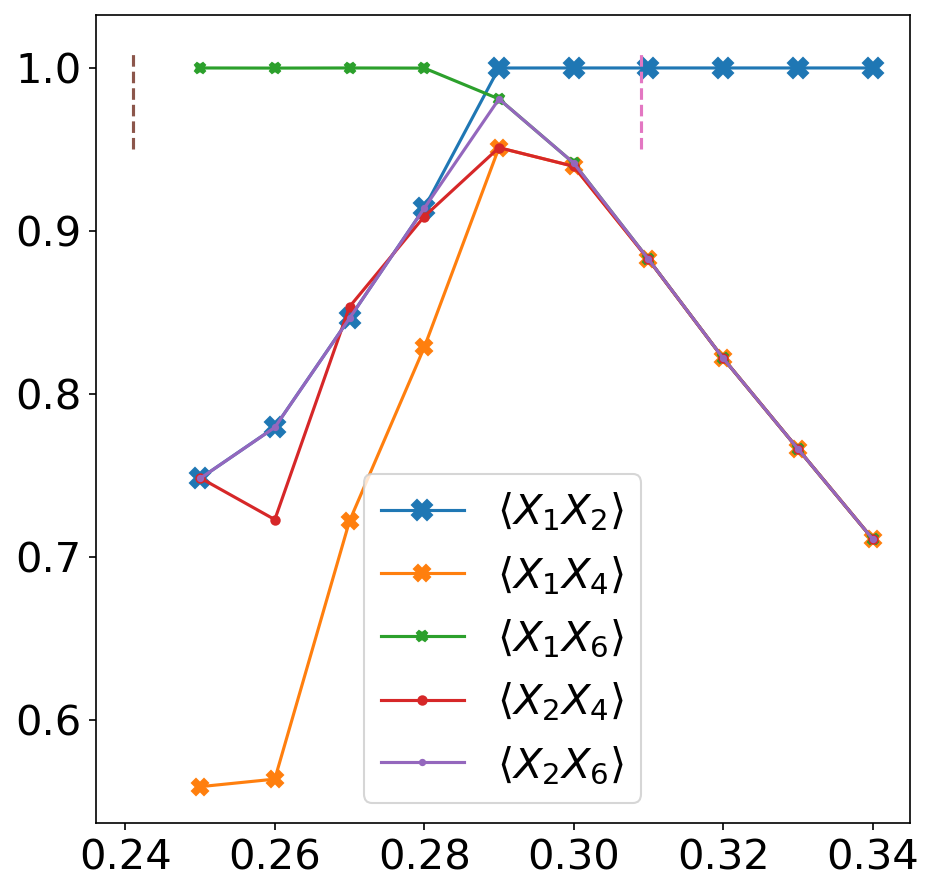

In [40]:
pyplot.figure(figsize=(7,7),dpi=150)
rng = np.arange(.25,.35,0.01)

pyplot.plot(rng ,lam12ss,'X-',markersize=10,
            label='$\langle X_1X_2\\rangle$')
pyplot.plot(rng ,lam14ss,'X-',markersize=8,
            label='$\langle X_1X_4\\rangle$')
pyplot.plot(rng ,lam16ss,'X-',markersize=5,
            label='$\langle X_1X_6\\rangle$')


pyplot.plot(rng ,lam24ss,'.-',markersize=8,
            label='$\langle X_2X_4\\rangle$')

pyplot.plot(rng ,lam26ss,'.-',markersize=5,
            label='$\langle X_2X_6\\rangle$')


pyplot.legend(prop={'size':20})

pyplot.plot([0.241,0.241],[0.95,1.01],'--')
pyplot.plot([0.309,0.309],[0.95,1.01],'--')

pyplot.xticks(size=20)
pyplot.yticks(size=20)

In [41]:
lam1ss=[]
lam12ss=[]
lam13ss=[]
lam14ss=[]
lam15ss=[]
lam16ss=[]
lam22ss=[]
lam23ss=[]
lam24ss=[]
lam25ss=[]
lam26ss=[]
lam123ss=[]
lam1234ss=[]
dims=[]

Z = np.array([[1,0],[0,-1]])
X = np.array([[0,1],[1,0]])
A = np.array([[0.3,0.2],[-0.2,0.1]])
B = np.zeros([1,1,64])
B[0,0] =linalg.expm((np.kron(A,np.kron(A,A)))).reshape([64,])

MPS = iMPS.iMPS()
MPS.svd_threshold =1e-10
MPS.max_bond = 10
MPS.construct_from_tensor_list([B,B])

#rng = np.arange(0.,.01,0.04)
for p1 in np.arange(.25,.35,0.01):   
    
    lam12s=[]
    lam13s=[]
    lam14s=[]
    lam1234s=[]
    lam123s=[]
    lam15s=[]
    lam16s=[]
    lam23s=[]
    lam24s=[]
    lam25s=[]
    lam26s=[]
    for p3 in np.arange(0.22,.3,2):
        t1 = time.time()
        trans = funcs.single_trans_3layers_test(p1=p1,channel1='x_flip',p2=0,channel2='x_flip',p3=0,channel3='x_flip')
        MPO = iMPS.iMPO()
        MPO.construct_from_tensor_list([trans,trans])

        MPS_power2 = iMPS.MPS_power_method_twosite(MPS,MPO,max_bond=10)
        MPS_power2.update(30,1e-4,1e-4)  
        
        dims.append(MPS_power2.MPS2.chi[0])
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO123,MPS_power2.MPS2)
        lam123 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO1234,MPS_power2.MPS2)
        lam1234 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO12,MPS_power2.MPS2)
        lam12 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO13,MPS_power2.MPS2)
        lam13 = strap.calculate_eig()
        
    
        strap = iMPS.strap(MPS_power2.MPS2,MPO14,MPS_power2.MPS2)
        lam14 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO15,MPS_power2.MPS2)
        lam15 = strap.calculate_eig()
        
    
        strap = iMPS.strap(MPS_power2.MPS2,MPO16,MPS_power2.MPS2)
        lam16 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO23,MPS_power2.MPS2)
        lam23 = strap.calculate_eig()
        
    
        strap = iMPS.strap(MPS_power2.MPS2,MPO24,MPS_power2.MPS2)
        lam24 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO25,MPS_power2.MPS2)
        lam25 = strap.calculate_eig()
        
    
        strap = iMPS.strap(MPS_power2.MPS2,MPO26,MPS_power2.MPS2)
        lam26 = strap.calculate_eig()
        
        lam123s.append(lam123)
        lam1234s.append(lam1234)
        lam12s.append(lam12)
        lam13s.append(lam13)
        lam14s.append(lam14)
        lam15s.append(lam15)
        lam16s.append(lam16)
        lam23s.append(lam23)
        lam24s.append(lam24)
        lam25s.append(lam25)
        lam26s.append(lam26)
        t2 =  time.time()
        print(p1)
        print(t2-t1)

    lam12ss.append(lam12s)
    lam13ss.append(lam13s)
    lam14ss.append(lam14s)
    lam15ss.append(lam15s)
    lam16ss.append(lam16s)
    
    lam1234ss.append(lam1234s)
    lam123ss.append(lam123s)
    lam23ss.append(lam23s)
    lam24ss.append(lam24s)
    lam25ss.append(lam25s)
    lam26ss.append(lam26s)
    #print(p1)

0.25
1034.2301669120789
0.26
1332.0961627960205
0.27
2291.1695532798767
0.28
3013.2654407024384
0.29000000000000004
1089.5073268413544
0.30000000000000004
1260.863802909851
0.31000000000000005
854.8469369411469
0.32000000000000006
744.0351967811584
0.33000000000000007
710.7526571750641
0.3400000000000001
690.8725109100342


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

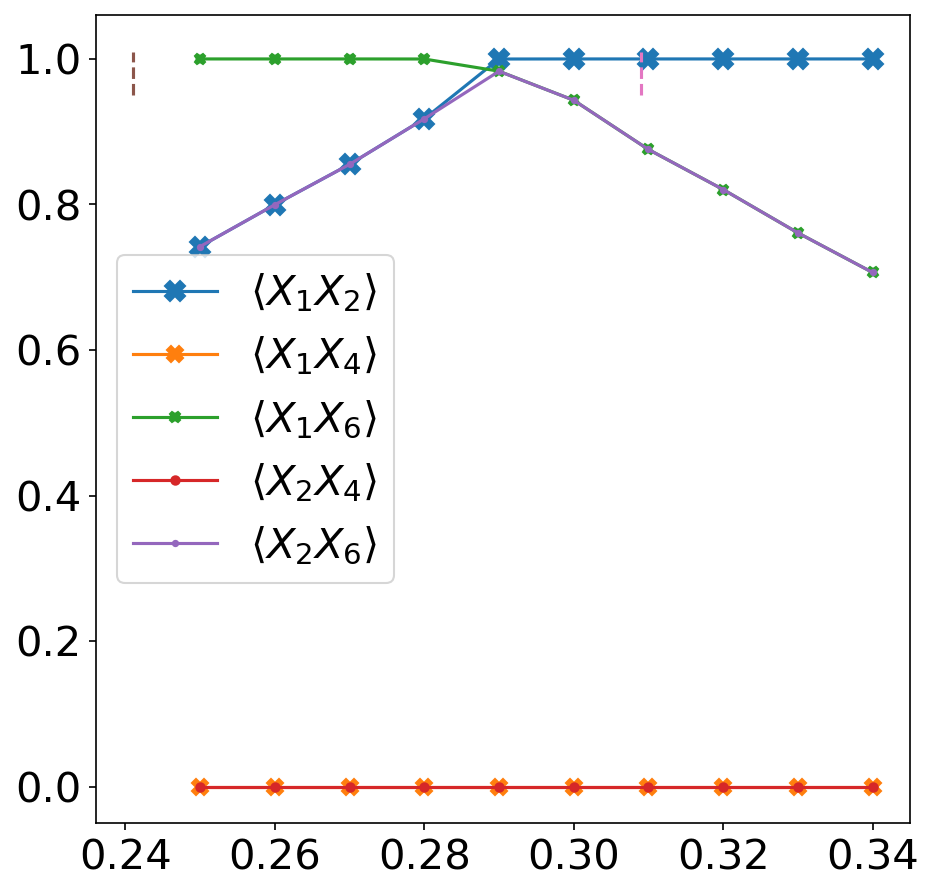

In [42]:
pyplot.figure(figsize=(7,7),dpi=150)
rng = np.arange(.25,.35,0.01)

pyplot.plot(rng ,lam12ss,'X-',markersize=10,
            label='$\langle X_1X_2\\rangle$')
pyplot.plot(rng ,lam14ss,'X-',markersize=8,
            label='$\langle X_1X_4\\rangle$')
pyplot.plot(rng ,lam16ss,'X-',markersize=5,
            label='$\langle X_1X_6\\rangle$')


pyplot.plot(rng ,lam24ss,'.-',markersize=8,
            label='$\langle X_2X_4\\rangle$')

pyplot.plot(rng ,lam26ss,'.-',markersize=5,
            label='$\langle X_2X_6\\rangle$')


pyplot.legend(prop={'size':20})

pyplot.plot([0.241,0.241],[0.95,1.01],'--')
pyplot.plot([0.309,0.309],[0.95,1.01],'--')

pyplot.xticks(size=20)
pyplot.yticks(size=20)

In [27]:
print(lam12)
print(lam13)
print(lam14)
print(lam15)
print(lam16)
print(lam123)
print(lam1234)
print(lam23)
print(lam24)

(0.9999997669241671+2.4103712806613906e-19j)
(0.802932642380734+5.414851903217232e-18j)
(2.452719810861893e-31+4.005595429750965e-15j)
(2.4527198108622765e-31-4.005595429751591e-15j)
(0.8029328216521966-3.156934996842555e-18j)
(3.813256066671787e-30+7.546197204779721e-15j)
(4.572339339680176e-31-7.467196816034822e-15j)
(0.8029328216521953-1.536535975630339e-18j)
(1.1330590128435109e-30-3.999827848023053e-15j)


(array([0.86, 0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.02]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

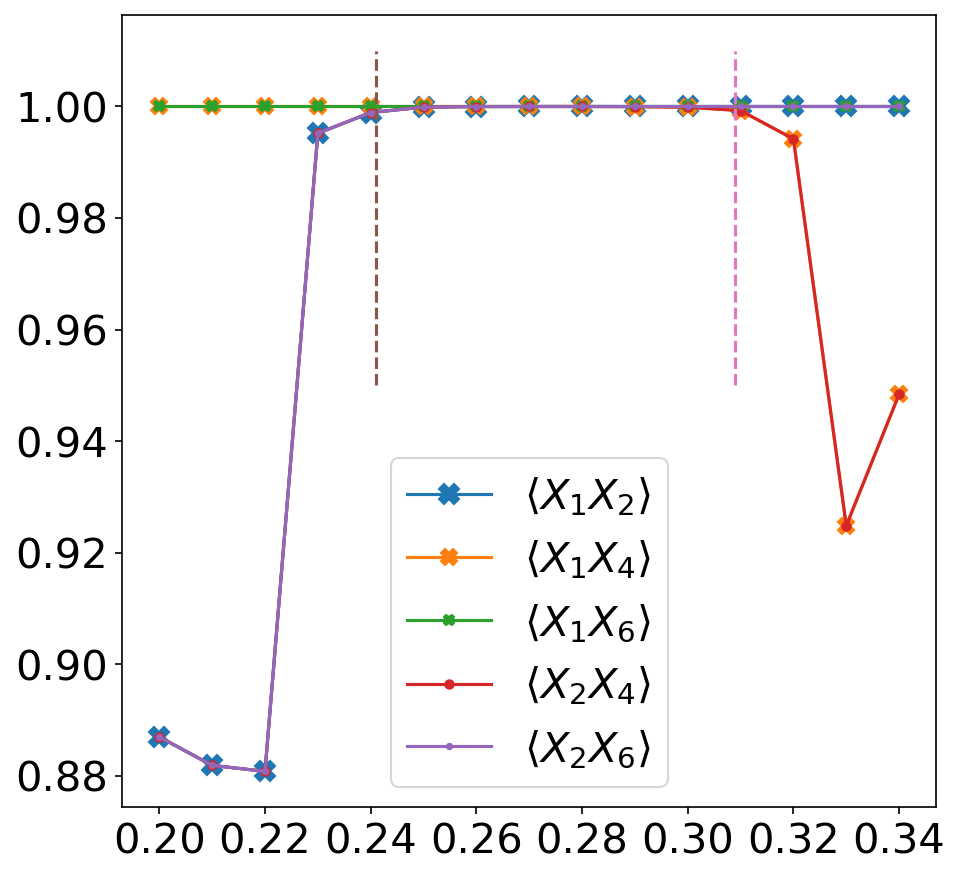

In [34]:
pyplot.figure(figsize=(7,7),dpi=150)
pyplot.plot(np.arange(0.2,.35,0.01),[[0.88697688],
 [0.88187827],[0.88080274],[0.99519095],[0.99891648],[0.99988636],[0.99998878],[0.99999696],
 [0.99999984],[0.99999991],[0.99999784],[1.        ],[1.        ],[1.        ],[1.        ]],'X-',markersize=10,
            label='$\langle X_1X_2\\rangle$')
pyplot.plot(np.arange(0.2,.35,0.01),[[1.        ],
 [1.        ], [1.        ], [1.        ],[0.99999999],[1.        ],[0.99999996],[0.99999982],
 [0.99999867],[0.99997901],[0.99987236],[0.99925582],[0.99418881],[0.92483838],[0.94841159]],'X-',markersize=8,
            label='$\langle X_1X_4\\rangle$')
pyplot.plot(np.arange(0.2,.35,0.01),[[1.        ],
 [1.        ], [1.        ], [1.        ],[1],[1.        ],[1],[1],
 [1],[1],[1],[1],[1],[1],[1]],'X-',markersize=5,
            label='$\langle X_1X_6\\rangle$')


pyplot.plot(np.arange(0.2,.35,0.01),[[0.88697688], [0.88187827],
 [0.88080274], [0.99519095], [0.99891647], [0.99988635], [0.9999888 ], [0.99999685], [0.99999868],
 [0.99997892], [0.9998702 ], [0.99925582], [0.99418881], [0.92483838], [0.94841159]],'.-',markersize=8,
            label='$\langle X_2X_4\\rangle$')

pyplot.plot(np.arange(0.2,.35,0.01),[[0.88697688],
 [0.88187827], [0.88080274], [0.99519095], [0.99891648], [0.99988636], [0.99998878], [0.99999696], [0.99999984],
 [0.99999991], [0.99999784], [1.        ], [1.        ], [1.        ], [1.        ]],'.-',markersize=5,
            label='$\langle X_2X_6\\rangle$')


pyplot.legend(prop={'size':20})

pyplot.plot([0.241,0.241],[0.95,1.01],'--')
pyplot.plot([0.309,0.309],[0.95,1.01],'--')

pyplot.xticks(size=20)
pyplot.yticks(size=20)

(array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

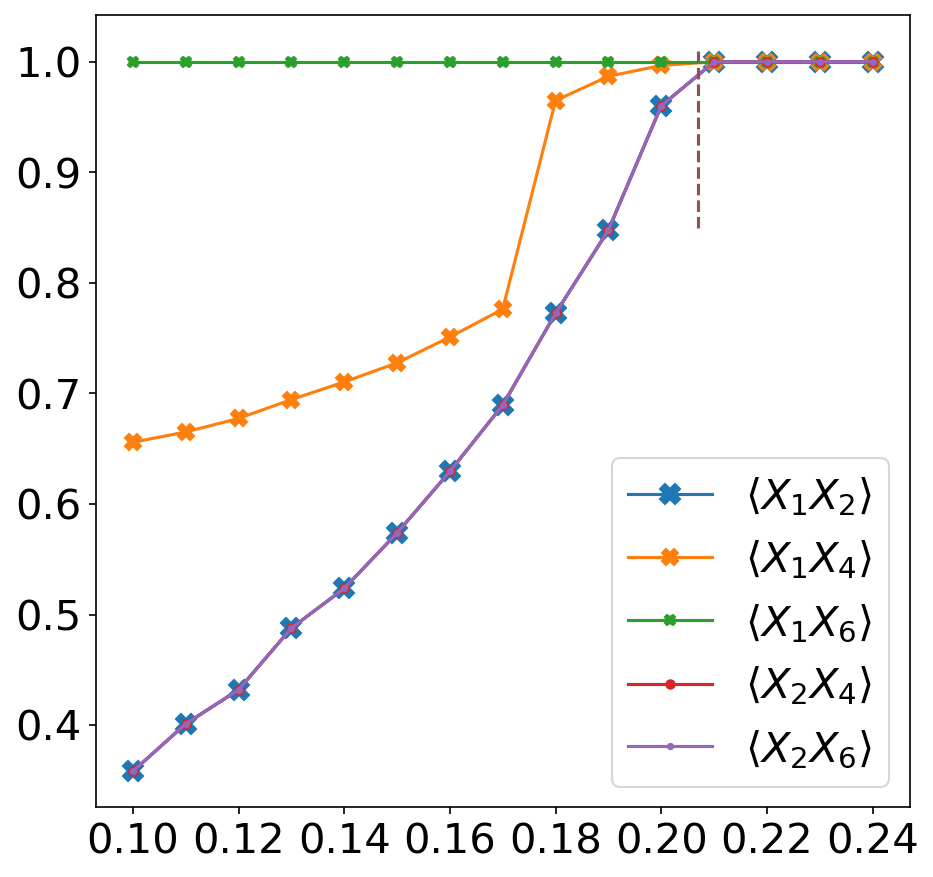

In [39]:
pyplot.figure(figsize=(7,7),dpi=150)
pyplot.plot(np.arange(0.1,.25,0.01),[0.35815172, 0.40112096, 0.43191805, 0.48771974, 0.52360718, 0.57374599,
0.62941747, 0.68947102, 0.77240874 ,0.84778241 ,0.96010958, 0.99988326,
0.9999492,
0.99999999, 0.99999997],'X-',markersize=10,
            label='$\langle X_1X_2\\rangle$')
pyplot.plot(np.arange(0.1,.25,0.01),[0.6557879, 0.66513376, 0.67735448, 0.69442677, 0.7103561, 0.72759214,
0.75100113, 0.77622203, 0.96489589, 0.98679435, 0.99667663 ,0.99999197,
0.9999492, 1.,
0.99999999],'X-',markersize=8,
            label='$\langle X_1X_4\\rangle$')
pyplot.plot(np.arange(0.1,.25,0.01),[[1.        ],
 [1.        ], [1.        ], [1.        ],[1],[1.        ],[1],[1],
 [1],[1],[1],[1],[1],[1],[1]],'X-',markersize=5,
            label='$\langle X_1X_6\\rangle$')


pyplot.plot(np.arange(0.1,.25,0.01),[0.35815172, 0.40112096, 0.43191805, 0.48771974, 0.52360718, 0.57374599,
0.62941747, 0.68947102, 0.77240874 ,0.84778241 ,0.96010958, 0.99988326,
0.9999492,
0.99999999, 0.99999997],'.-',markersize=8,
            label='$\langle X_2X_4\\rangle$')

pyplot.plot(np.arange(0.1,.25,0.01),[0.35815172, 0.40112096, 0.43191805, 0.48771974, 0.52360718, 0.57374599,
0.62941747, 0.68947102, 0.77240874 ,0.84778241 ,0.96010958, 0.99988326,
0.9999492,
0.99999999, 0.99999997],'.-',markersize=5,
            label='$\langle X_2X_6\\rangle$')


pyplot.legend(prop={'size':20})

pyplot.plot([0.207,0.207],[0.85,1.01],'--')
#pyplot.plot([0.309,0.309],[0.95,1.01],'--')

pyplot.xticks(size=20)
pyplot.yticks(size=20)



(array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

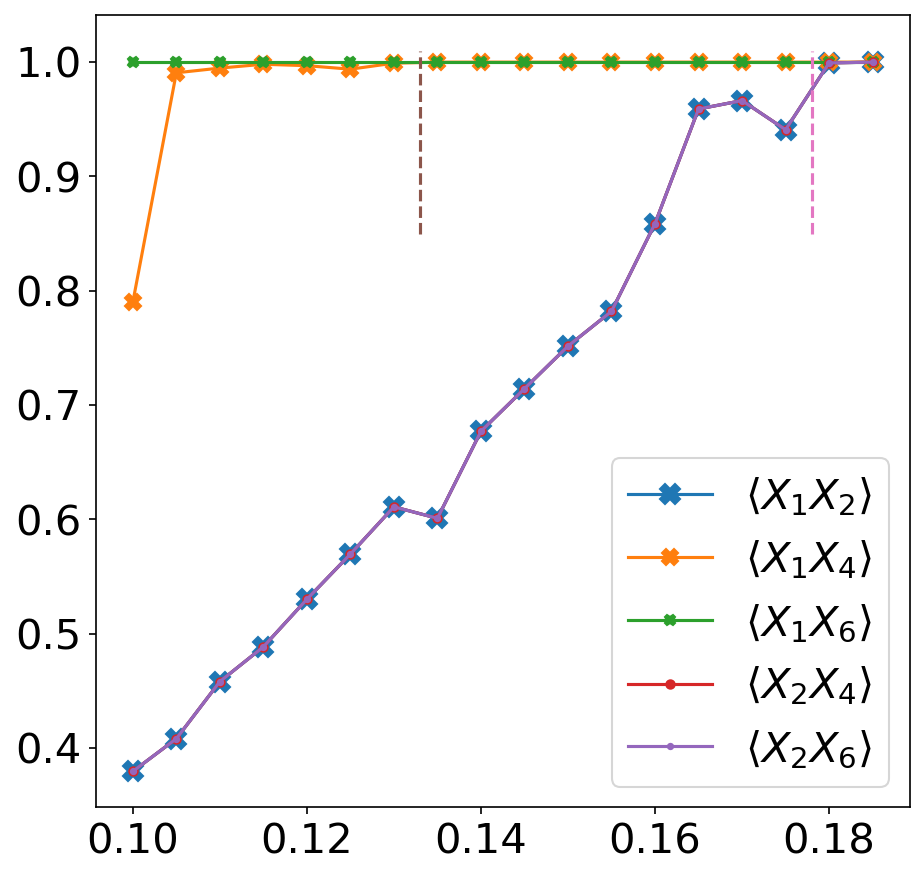

In [50]:
pyplot.figure(figsize=(7,7),dpi=150)
pyplot.plot(np.arange(0.1,.19,0.005),[ [0.37957724],[0.40816467],
[0.4581529 ],[0.48854245],[0.53012477],
[0.56967493],[0.61098732],[0.60096116],[0.67708963],[0.71433664],[0.75160039],[0.7820151 ],
[0.85876899],[0.95899708],[0.96637522],[0.94089818],[0.99932108],[0.99999135]],'X-',markersize=10,
            label='$\langle X_1X_2\\rangle$')
pyplot.plot(np.arange(0.1,.19,0.005),[[0.79000429],
[0.99067673],[0.99479694],[0.99813736],[0.9969016 ],[0.99383189],[0.99909899],[0.99998684],[0.99999996],[0.99999354],
[0.99999999],[1.],[1.],[1.],[1.],[1.],[1.],[1.]],'X-',markersize=8,
            label='$\langle X_1X_4\\rangle$')
pyplot.plot(np.arange(0.1,.19,0.005),[[1.        ],
 [1.        ], [1.        ], [1.        ],[1],[1.        ],[1],[1],
 [1],[1],[1],[1],[1],[1],[1],[1],[1],[1]],'X-',markersize=5,
            label='$\langle X_1X_6\\rangle$')


pyplot.plot(np.arange(0.1,.19,0.005),[ [0.37957724],[0.40816467],
[0.4581529 ],[0.48854245],[0.53012477],
[0.56967493],[0.61098732],[0.60096116],[0.67708963],[0.71433664],[0.75160039],[0.7820151 ],
[0.85876899],[0.95899708],[0.96637522],[0.94089818],[0.99932108],[0.99999135]],'.-',markersize=8,
            label='$\langle X_2X_4\\rangle$')

pyplot.plot(np.arange(0.1,.19,0.005),[ [0.37957724],[0.40816467],
[0.4581529 ],[0.48854245],[0.53012477],
[0.56967493],[0.61098732],[0.60096116],[0.67708963],[0.71433664],[0.75160039],[0.7820151 ],
[0.85876899],[0.95899708],[0.96637522],[0.94089818],[0.99932108],[0.99999135]],'.-',markersize=5,
            label='$\langle X_2X_6\\rangle$')


pyplot.legend(prop={'size':20})

pyplot.plot([0.133,0.133],[0.85,1.01],'--')
pyplot.plot([0.178,0.178],[0.85,1.01],'--')

pyplot.xticks(size=20)
pyplot.yticks(size=20)

(array([0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

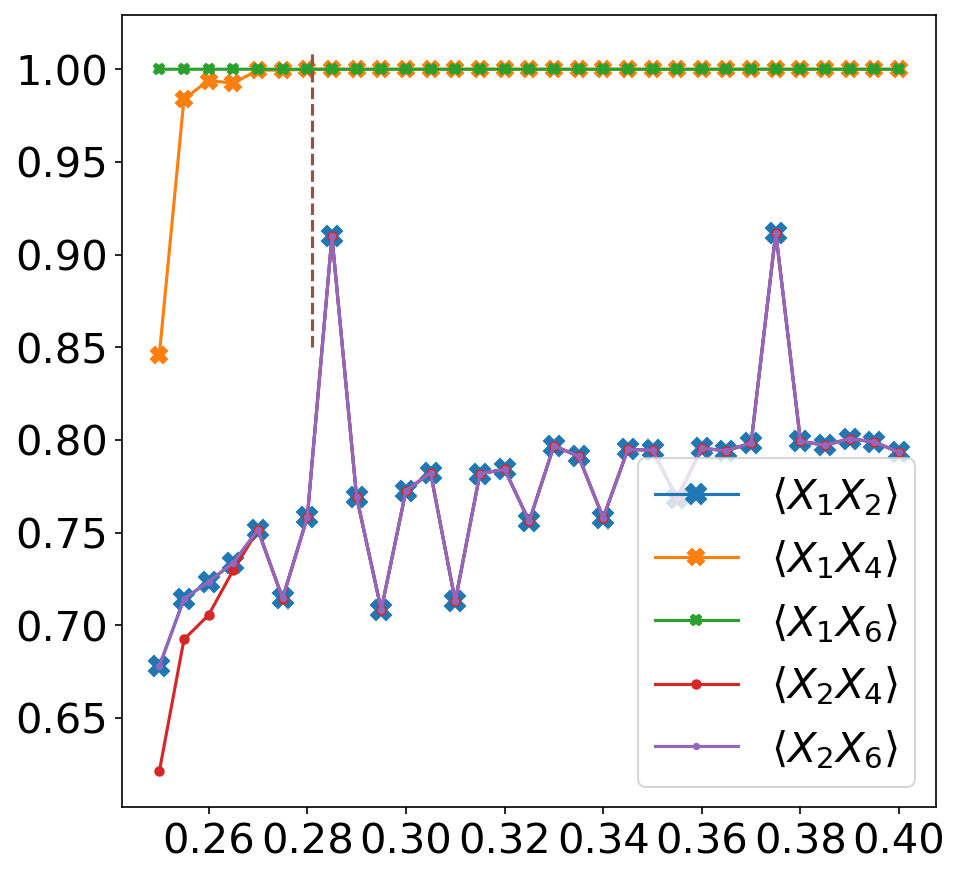

In [59]:
pyplot.figure(figsize=(7,7),dpi=150)
pyplot.plot(np.arange(0.25,.4,0.005),[0.67795447, 0.7142868, 0.72353232, 0.73379032, 0.75153694, 0.71474967,
0.75829171, 0.9098674 ,0.76931268 ,0.70836976, 0.77260293, 0.78238941,
0.71305431, 0.78174685, 0.78421087, 0.75611885 ,0.79683658, 0.79126342,
0.75801386, 0.79490017, 0.79452621, 0.76853754, 0.79550155, 0.79421393,
0.7983581, 0.91185382 ,0.7993171 ,0.79718458, 0.80071684, 0.79888634,
0.79338966],'X-',markersize=10,
            label='$\langle X_1X_2\\rangle$')
pyplot.plot(np.arange(0.25,.4,0.005),[0.84594488 ,0.98401758, 0.99388938, 0.99250025 ,0.99951265, 0.99954765,
  0.99999778 ,0.99999563, 0.99999977, 0.99999931, 0.99999994, 1.,
  0.99999985 ,0.99999999, 0.99999999, 1.         ,1.  ,       1.,
  1.         ,1.         ,1. ,        0.99999998 ,1. ,        0.99999999,
  1.        , 1.         ,1.,         1.         ,1.,         1.,
  0.99999999],'X-',markersize=8,
            label='$\langle X_1X_4\\rangle$')
pyplot.plot(np.arange(0.25,.4,0.005),[1 ,1, 1, 1 ,1, 1,
  0.99999778 ,0.99999563, 0.99999977, 0.99999931, 0.99999994, 1.,
  0.99999985 ,0.99999999, 0.99999999, 1.         ,1.  ,       1.,
  1.         ,1.         ,1. ,        0.99999998 ,1. ,        0.99999999,
  1.        , 1.         ,1.,         1.         ,1.,         1.,
  0.99999999],'X-',markersize=5,
            label='$\langle X_1X_6\\rangle$')


pyplot.plot(np.arange(0.25,.4,0.005),[0.62123334, 0.69240609, 0.70563507, 0.72985671, 0.75140559, 0.71431977,
  0.75829106 ,0.90984277, 0.76931261, 0.7083696 , 0.77260291, 0.78238941,
  0.71305427 ,0.78174685, 0.78421087, 0.75611885, 0.79683658, 0.79126342,
  0.75801386, 0.79490017, 0.79452621, 0.76853754, 0.79550155, 0.79421393,
  0.7983581 , 0.91185382, 0.7993171 , 0.79718458, 0.80071684, 0.79888634,
  0.79338966],'.-',markersize=8,
            label='$\langle X_2X_4\\rangle$')

pyplot.plot(np.arange(0.25,.4,0.005),[0.67795447, 0.7142868, 0.72353232, 0.73379032, 0.75153694, 0.71474967,
0.75829171, 0.9098674 ,0.76931268 ,0.70836976, 0.77260293, 0.78238941,
0.71305431, 0.78174685, 0.78421087, 0.75611885 ,0.79683658, 0.79126342,
0.75801386, 0.79490017, 0.79452621, 0.76853754, 0.79550155, 0.79421393,
0.7983581, 0.91185382 ,0.7993171 ,0.79718458, 0.80071684, 0.79888634,
0.79338966],'.-',markersize=5,
            label='$\langle X_2X_6\\rangle$')


pyplot.legend(prop={'size':20})

pyplot.plot([0.281,0.281],[0.85,1.01],'--')
#pyplot.plot([0.178,0.178],[0.85,1.01],'--')

pyplot.xticks(size=20)
pyplot.yticks(size=20)